WTI가 음수인 경우는 왜 있는건지?

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [14]:
train = pd.read_parquet("../data/train.parquet")
test = pd.read_parquet("../data/test.parquet")

In [16]:
train['ATA'] = pd.to_datetime(train['ATA'])
test['ATA'] = pd.to_datetime(test['ATA'])

# datetime을 여러 파생 변수로 변환
for df in [train, test]:
    df['year'] = df['ATA'].dt.year
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday

train.drop(columns=['ATA', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN'], inplace=True)
test.drop(columns=['ATA', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN'], inplace=True)

/Users/BSH/Desktop/Project/dacon/HD_challenge/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/BSH/Desktop/Project/dacon/HD_challenge/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


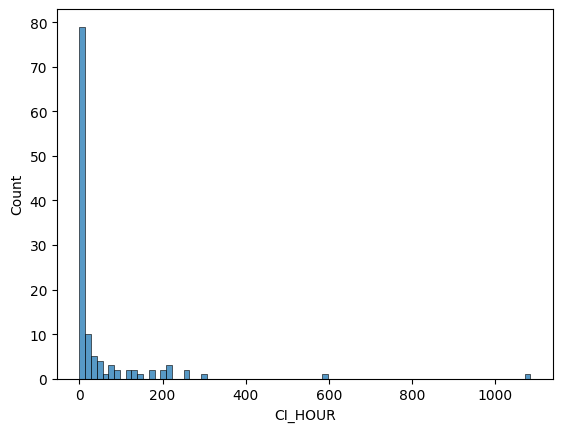

In [18]:
tmp_train = train[train["WTI"] < 0]
sns.histplot(tmp_train["CI_HOUR"])
plt.show()

In [20]:
test[test["WTI"]<0]

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,BRENT,WTI,BDI_ADJ,PORT_SIZE,year,month,day,hour,minute,weekday
491,TEST_000491,CN,EKP8,Bulk,0.000000,Z258354,30.0,24,73700,20.0,...,25.57,-37.63,693.822076,0.001660,2020,4,20,11,28,0
5355,TEST_005355,SG,GIW5,Container,11.517067,W251578,30.0,16,39300,20.0,...,25.57,-37.63,693.822076,0.002615,2020,4,19,3,24,6
9231,TEST_009231,CN,NGG6,Container,1.770441,A174228,20.0,19,12600,10.0,...,25.57,-37.63,693.822076,0.001743,2020,4,20,15,46,0
11083,TEST_011083,RU,NNC2,Container,0.000000,R786427,30.0,17,39300,20.0,...,25.57,-37.63,693.822076,0.000197,2020,4,20,16,8,0
22302,TEST_022302,AU,QGL7,Bulk,17.616498,I358121,30.0,12,58100,20.0,...,25.57,-37.63,693.822076,0.000016,2020,4,17,20,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222488,TEST_222488,IN,JER7,Container,0.000000,T617518,40.0,13,103000,20.0,...,25.57,-37.63,693.822076,0.000235,2020,4,20,17,13,0
228546,TEST_228546,CN,JTD1,Bulk,36.691258,I642736,40.0,12,179000,20.0,...,25.57,-37.63,693.822076,0.000557,2020,4,20,1,18,0
229751,TEST_229751,JP,LXJ7,Bulk,0.000000,V844826,60.0,11,251000,30.0,...,25.57,-37.63,693.822076,0.000320,2020,4,20,10,41,0
239167,TEST_239167,CN,NGG6,Container,1.018128,E213871,30.0,6,36900,20.0,...,25.57,-37.63,693.822076,0.001743,2020,4,20,15,42,0


In [10]:
tmp_df.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR,year,month,day,hour,minute,weekday
4100,TRAIN_004100,MZ,OZD2,Container,15.792119,L345311,20.0,27,18400,10.0,...,-37.63,693.822076,0.000041,3.017222,2020,4,20,16,50,0
5678,TRAIN_005678,CN,EKP8,Bulk,31.005467,D575874,30.0,11,56600,20.0,...,-37.63,693.822076,0.001660,2.924722,2020,4,19,21,7,6
6149,TRAIN_006149,TW,JWI3,Bulk,19.617501,F286466,40.0,13,87300,20.0,...,-37.63,693.822076,0.000990,4.785556,2020,4,19,21,0,6
12103,TRAIN_012103,TW,JWI3,Bulk,13.276385,H721528,40.0,12,105000,20.0,...,-37.63,693.822076,0.000990,3.297222,2020,4,19,21,20,6
14679,TRAIN_014679,CN,NGG6,Container,0.000000,X265562,20.0,10,12300,10.0,...,-37.63,693.822076,0.001743,0.000000,2020,4,20,0,10,0


In [11]:
tmp_df["year"].unique()

array([2020], dtype=int32)

In [12]:
tmp_df["month"].unique()


array([4, 3], dtype=int32)

2020년도 선물 청산 못해서 마이너스로 매각한 사건 있음 이부분 따로 feature 만드는게 좋을 듯 함